In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.cluster import adjusted_mutual_info_score

In [3]:
DATA_PATH = './scripts/data/'

df_train_full = pd.read_csv(DATA_PATH+'train.csv.gz')
df_test = pd.read_csv(DATA_PATH+'test.csv.gz')

df_train_full.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
columns_numerical = df_train_full.select_dtypes(include=['number']).columns.to_list()
columns_numerical_discrete   = df_train_full.select_dtypes(include=['integer']).columns.to_list()
columns_numerical_continuous = df_train_full.select_dtypes(include=['inexact']).columns.to_list()

columns_categorical = df_train_full.select_dtypes(include=['flexible', 'object', 'bool']).columns.to_list()
columns_datetime    = df_train_full.select_dtypes(include=['datetime64', 'timedelta64']).columns.to_list()

print(f'Numerical Columns (Discrete):\n{columns_numerical_discrete}', '\n')
print(f'Numerical Columns (Continuous):\n{columns_numerical_continuous}', '\n')
print(f'Categorical Columns:\n{columns_categorical}', '\n')
print(f'Datetime Columns:\n{columns_datetime}', '\n')

Numerical Columns (Discrete):
['id'] 

Numerical Columns (Continuous):
['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'] 

Categorical Columns:
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 

In [5]:
# manual features grouping

features_numerical   = [column for column in df_train_full if column.startswith('cont')]
features_categorical = [column for column in df_train_full if column.startswith('cat')]
column_target = 'loss'

print(f'Target Column:\n{column_target}', '\n')
print(f'Numerical Features: {len(features_numerical)}\n{features_numerical}', '\n')
print(f'Categorical Features: {len(features_categorical)}\n{features_categorical}', '\n')

Target Column:
loss 

Numerical Features: 14
['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'] 

Categorical Features: 116
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'c

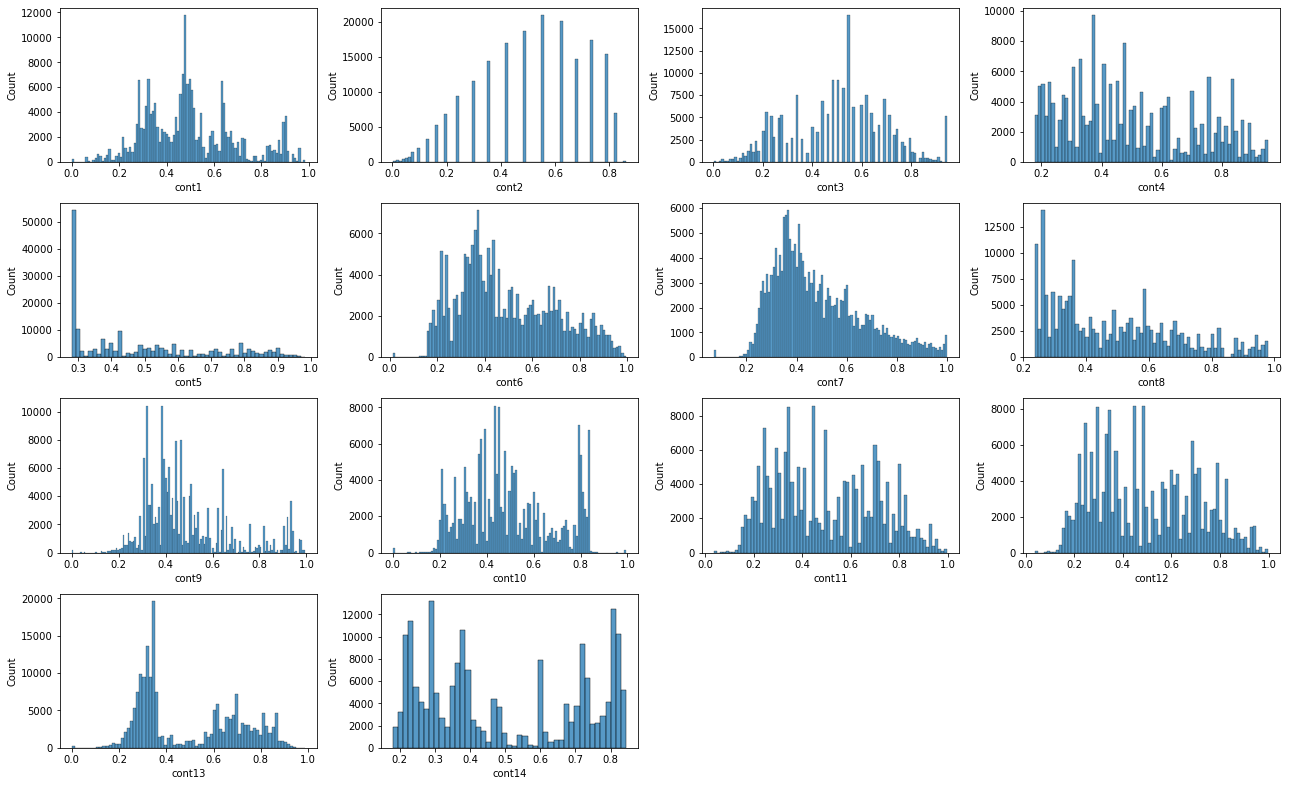

In [6]:
fig = plt.figure(figsize=(18, 16))

for index, column in enumerate(df_train_full[features_numerical]):
    plt.subplot(6, 4, index+1)
    sns.histplot(df_train_full[column].dropna(), kde=False)

fig.tight_layout(pad=1.0)

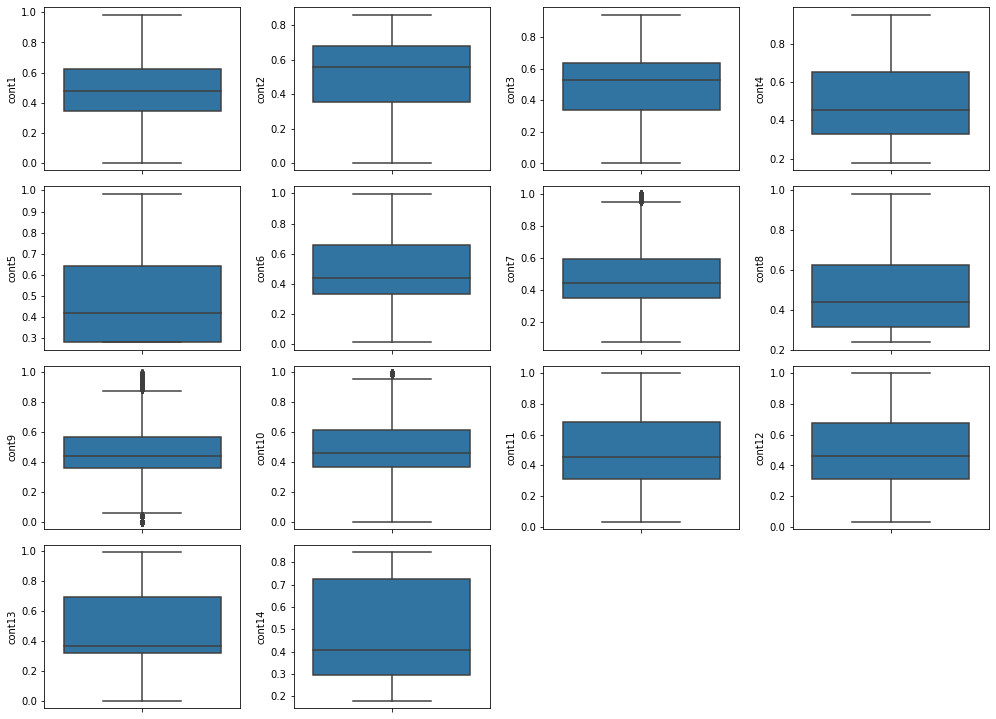

In [7]:
fig = plt.figure(figsize=(14, 15))

for index, column in enumerate(df_train_full[features_numerical]):
    plt.subplot(6, 4, index+1)
    sns.boxplot(y=column, data=df_train_full.dropna())

fig.tight_layout(pad=1.0)

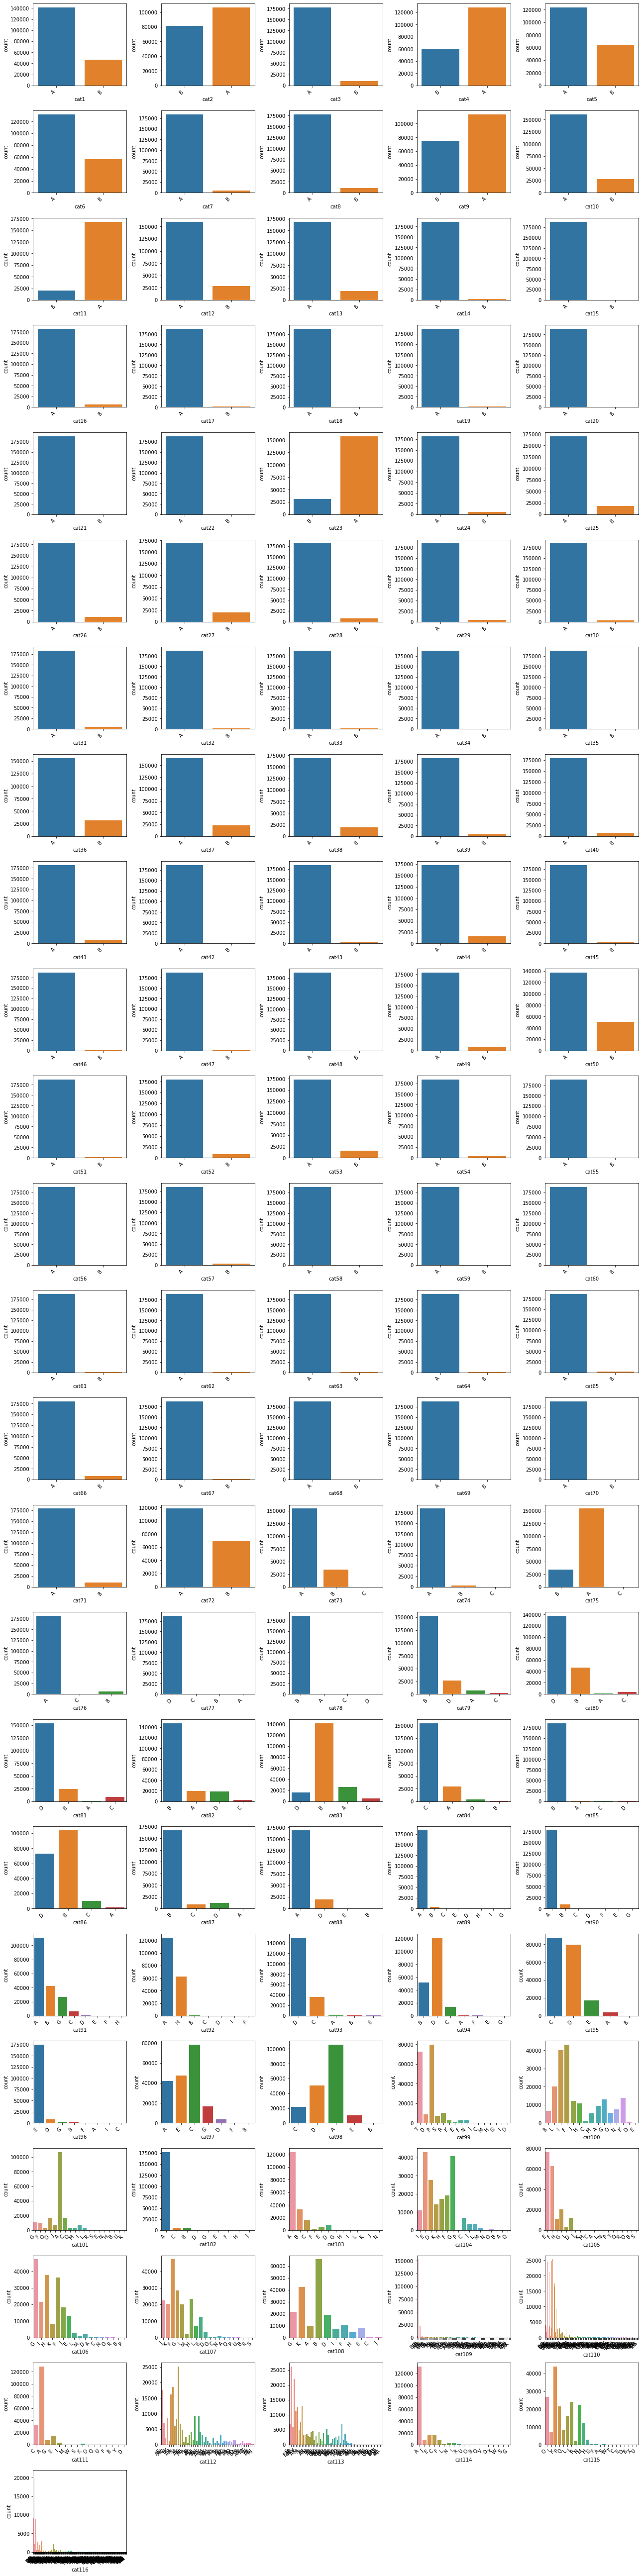

In [8]:
features_categorical_count = len(df_train_full[features_categorical].columns)
plots_per_row  = 5
number_of_rows = (features_categorical_count // plots_per_row) + 1

fig = plt.figure(figsize=(18, number_of_rows*3))
for index in range(features_categorical_count):
    plt.subplot(number_of_rows, plots_per_row, index+1)
    sns.countplot(x=df_train_full[features_categorical].iloc[:,index], data=df_train_full[features_categorical])
    plt.xticks(rotation=45, ha='right')

fig.tight_layout(pad=1.0)

In [9]:
highly_skewed_threshold = 0.999

highly_skewed_categorical = []

print('Very Highly Skewed Categorical Columns:\n')
print('Column Name \t Frequent Value Ratio'.expandtabs(20))
for column_name in df_train_full[features_categorical].columns:
    value_counts = df_train_full[column_name].value_counts()
    most_frequent_value_count = value_counts.iloc[0]
    frequency = most_frequent_value_count / len(df_train_full)
    if frequency >= highly_skewed_threshold:
        highly_skewed_categorical.append(column_name)
        print('{}: \t {:.2%}'.format(column_name, frequency).expandtabs(20))

print(f'\nFeature Names:\n{highly_skewed_categorical}')

Very Highly Skewed Categorical Columns:

Column Name          Frequent Value Ratio
cat15:               99.98%
cat22:               99.98%
cat55:               99.92%
cat56:               99.90%
cat62:               99.98%
cat63:               99.96%
cat64:               99.98%
cat68:               99.92%
cat70:               99.99%

Feature Names:
['cat15', 'cat22', 'cat55', 'cat56', 'cat62', 'cat63', 'cat64', 'cat68', 'cat70']


In [10]:
categorical_test_columns_with_classes_missing_in_train = [column for column in features_categorical if len(set(df_test[column].value_counts().index) - set(df_train_full[column].value_counts().index)) > 0]

print(f'Columns in categorical test features with classes not present in train data: {len(categorical_test_columns_with_classes_missing_in_train)}\n{categorical_test_columns_with_classes_missing_in_train}')

Columns in categorical test features with classes not present in train data: 11
['cat89', 'cat92', 'cat96', 'cat99', 'cat103', 'cat106', 'cat109', 'cat110', 'cat111', 'cat113', 'cat116']


[Text(0.5, 0, 'cont1'),
 Text(1.5, 0, 'cont2'),
 Text(2.5, 0, 'cont3'),
 Text(3.5, 0, 'cont4'),
 Text(4.5, 0, 'cont5'),
 Text(5.5, 0, 'cont6'),
 Text(6.5, 0, 'cont7'),
 Text(7.5, 0, 'cont8'),
 Text(8.5, 0, 'cont9'),
 Text(9.5, 0, 'cont10'),
 Text(10.5, 0, 'cont11'),
 Text(11.5, 0, 'cont12'),
 Text(12.5, 0, 'cont13'),
 Text(13.5, 0, 'cont14')]

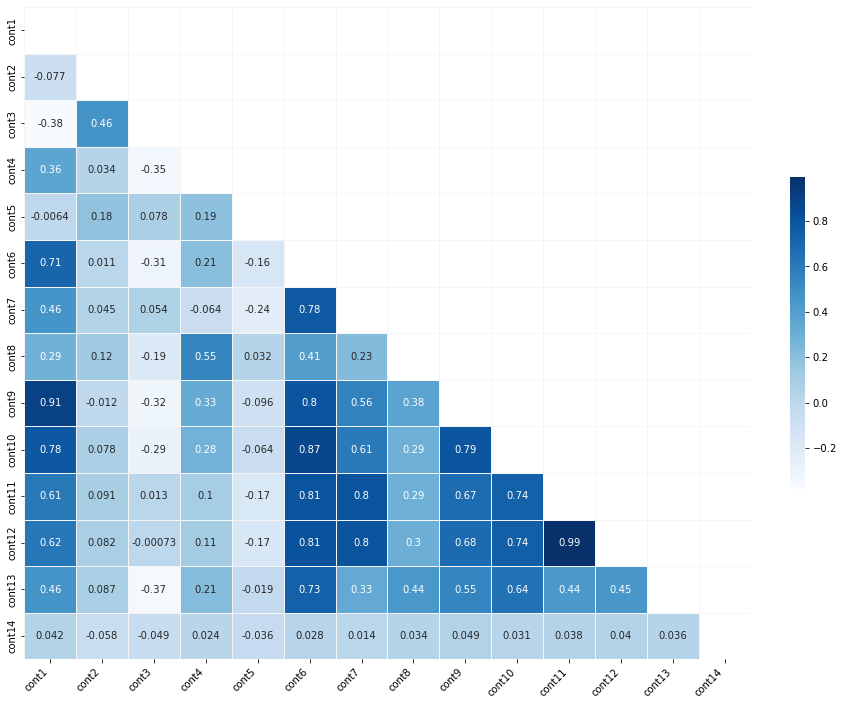

In [11]:
correlation = df_train_full[features_numerical].corr(method='spearman')

# create a mask to keep only half of matrix
trimask_numerical = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, linewidth=1, linecolor='whitesmoke', cmap='Blues', mask=trimask_numerical, annot=True, cbar_kws={'fraction' : 0.02})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')


In [12]:
RANDOM_SEED = 1024
subsample_fraction = 0.06
max_samples = int(subsample_fraction * len(df_train_full))
df_train_subsample = df_train_full.sample(n=max_samples, random_state=RANDOM_SEED)


# function to scale a list of numbers to range of [(min/max), 1]
def scale_to_1(input_list, precision=4):
    input_list_max = max(input_list)
    return [round((np.log1p(item))/(np.log1p(input_list_max)), precision) for item in input_list]

# calculate mutual info scores for each candidate feature and store them in a list
mutual_scores = list()
mutual_score_hash = dict()
for i, column in enumerate(features_categorical):
    scores_for_column = list()
    for j, other_column in enumerate(features_categorical):
        if ((i, j) not in mutual_score_hash.keys()) and ((j, i) not in mutual_score_hash.keys()):
            score = adjusted_mutual_info_score(df_train_subsample[column], df_train_subsample[other_column])
            mutual_score_hash[(i, j)], mutual_score_hash[(j, i)] = score, score
        scores_for_column.append(mutual_score_hash[(i, j)])
    mutual_scores.append(scale_to_1(scores_for_column))

In [13]:
mutual_info_matrix = pd.DataFrame(mutual_scores, index=features_categorical, columns=features_categorical)

[Text(0.5, 0, 'cat1'),
 Text(1.5, 0, 'cat2'),
 Text(2.5, 0, 'cat3'),
 Text(3.5, 0, 'cat4'),
 Text(4.5, 0, 'cat5'),
 Text(5.5, 0, 'cat6'),
 Text(6.5, 0, 'cat7'),
 Text(7.5, 0, 'cat8'),
 Text(8.5, 0, 'cat9'),
 Text(9.5, 0, 'cat10'),
 Text(10.5, 0, 'cat11'),
 Text(11.5, 0, 'cat12'),
 Text(12.5, 0, 'cat13'),
 Text(13.5, 0, 'cat14'),
 Text(14.5, 0, 'cat15'),
 Text(15.5, 0, 'cat16'),
 Text(16.5, 0, 'cat17'),
 Text(17.5, 0, 'cat18'),
 Text(18.5, 0, 'cat19'),
 Text(19.5, 0, 'cat20'),
 Text(20.5, 0, 'cat21'),
 Text(21.5, 0, 'cat22'),
 Text(22.5, 0, 'cat23'),
 Text(23.5, 0, 'cat24'),
 Text(24.5, 0, 'cat25'),
 Text(25.5, 0, 'cat26'),
 Text(26.5, 0, 'cat27'),
 Text(27.5, 0, 'cat28'),
 Text(28.5, 0, 'cat29'),
 Text(29.5, 0, 'cat30'),
 Text(30.5, 0, 'cat31'),
 Text(31.5, 0, 'cat32'),
 Text(32.5, 0, 'cat33'),
 Text(33.5, 0, 'cat34'),
 Text(34.5, 0, 'cat35'),
 Text(35.5, 0, 'cat36'),
 Text(36.5, 0, 'cat37'),
 Text(37.5, 0, 'cat38'),
 Text(38.5, 0, 'cat39'),
 Text(39.5, 0, 'cat40'),
 Text(40.5, 0, 'cat

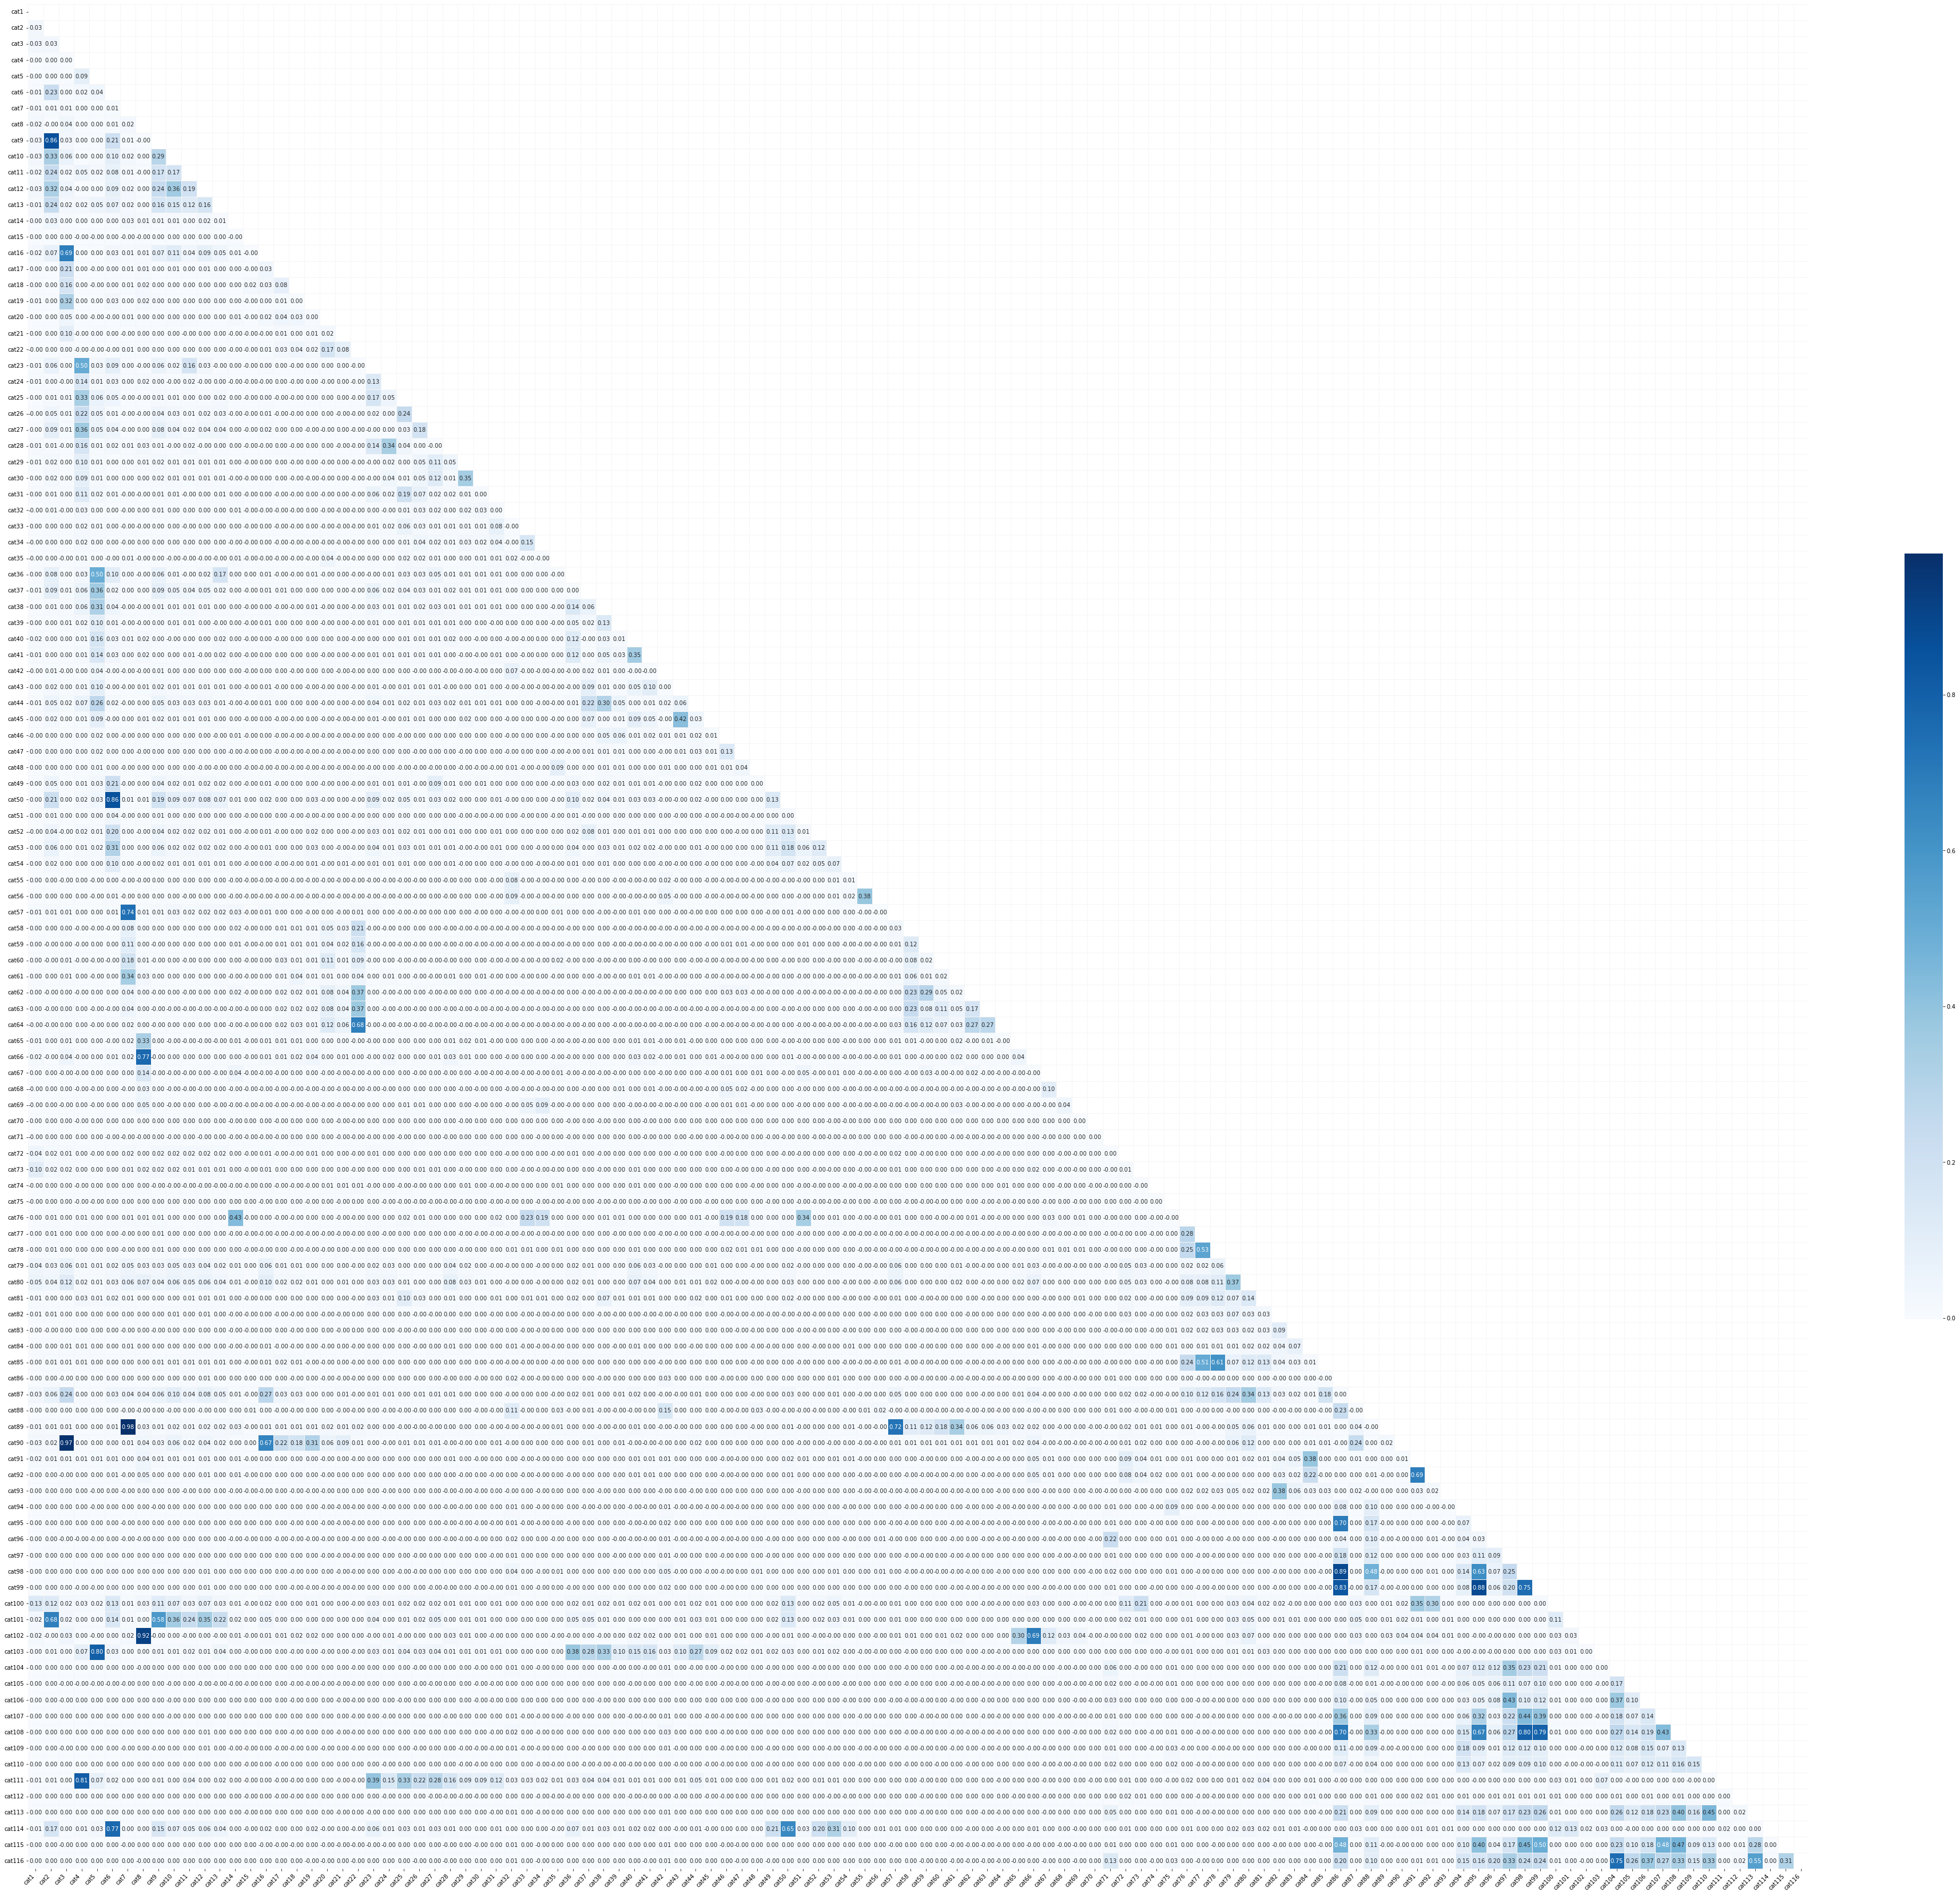

In [14]:
trimask_categorical = np.triu(np.ones_like(mutual_info_matrix, dtype=bool))

plt.figure(figsize=(60, 60))
heatmap = sns.heatmap(mutual_info_matrix, linewidth=1, linecolor='whitesmoke', cmap='Blues', mask=trimask_categorical,  annot=True, fmt='.2f', cbar_kws={'fraction': 0.02})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

In [15]:
# create a dictionary with categorical feature pairs as keys, and mutual score as value
categorical_corr_dict = dict()
for i, scores_list in enumerate(mutual_scores):
    for j, score in enumerate(scores_list):
        categorical_corr_dict[(features_categorical[i], features_categorical[j])] = mutual_scores[i][j]

In [16]:
# create score pairs dataframe
mi_score_df = pd.DataFrame.from_dict(categorical_corr_dict, orient='index', columns=['mutual_info_score'])
mi_score_df

,mutual_info_score
"(cat1, cat1)",1.0000
"(cat1, cat2)",0.0271
"(cat1, cat3)",0.0295
"(cat1, cat4)",0.0017
"(cat1, cat5)",0.0008
...,...
"(cat116, cat112)",0.0189
"(cat116, cat113)",0.5540
"(cat116, cat114)",0.0035
"(cat116, cat115)",0.3118


In [17]:
# sort dataframe by scores
mi_score_df_sorted = mi_score_df.sort_values(by=['mutual_info_score'], ascending=False)

# there are two values for each pair: (column_name, other_column_name) <--> (other_column_name, column_name)
# slice scores dataframe every two rows
mi_score_df_sorted_final = mi_score_df_sorted[mi_score_df_sorted['mutual_info_score'] < 1][::2]
mi_score_df_sorted_final

,mutual_info_score
"(cat7, cat89)",0.9810
"(cat90, cat3)",0.9714
"(cat102, cat8)",0.9159
"(cat98, cat86)",0.8880
"(cat99, cat95)",0.8828
...,...
"(cat77, cat61)",-0.0014
"(cat77, cat67)",-0.0014
"(cat46, cat77)",-0.0014
"(cat109, cat84)",-0.0015


In [18]:
# let's review the top 30
mi_score_df_sorted_final[:30]

,mutual_info_score
"(cat7, cat89)",0.9810
"(cat90, cat3)",0.9714
"(cat102, cat8)",0.9159
"(cat98, cat86)",0.8880
"(cat99, cat95)",0.8828
"(cat2, cat9)",0.8619
"(cat50, cat6)",0.8551
"(cat99, cat86)",0.8329
"(cat111, cat4)",0.8117
"(cat103, cat5)",0.8006


In [19]:
missing_values_count_train = sum(df_train_full.isnull().sum().tolist())
missing_values_count_test  = sum(df_test.isnull().sum().tolist())

train_columns_with_missing_values, test_columns_with_missing_values = [], []
if missing_values_count_train > 0:
    train_columns_with_missing_values = df_train_full.columns[df_train_full.isnull().any()]
if missing_values_count_test  > 0:
    test_columns_with_missing_values  = df_test.columns[df_test.isnull().any()]


print(f'Train Samples with Missing Values: {missing_values_count_train}\nColumn Names with Missing Values: {list(train_columns_with_missing_values)}', '\n')
print(f'Test Samples with Missing Values: {missing_values_count_test}\nColumn Names with Missing Values: {list(test_columns_with_missing_values)}', '\n')

Train Samples with Missing Values: 0
Column Names with Missing Values: [] 

Test Samples with Missing Values: 0
Column Names with Missing Values: [] 



In [20]:
column_target = 'loss'
print(f'Target Column {column_target} Stats:\n')
print(f'min value: {df_train_full[column_target].min()}\n'+
      f'max value: {df_train_full[column_target].max()}\n'+
      f'avg: {df_train_full[column_target].mean()}\n'+
      f'std: {df_train_full[column_target].std()}')

Target Column loss Stats:

min value: 0.67
max value: 121012.25
avg: 3037.3376856699792
std: 2904.0861863904365


<AxesSubplot:xlabel='loss', ylabel='Count'>

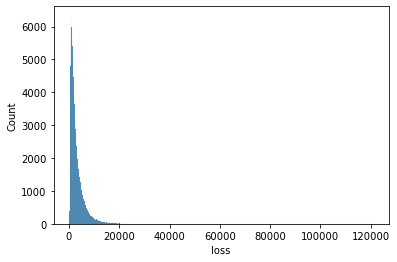

In [21]:
sns.histplot(df_train_full[column_target])

<AxesSubplot:ylabel='Count'>

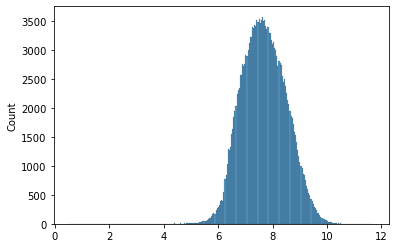

In [22]:
import numpy as np


column_target_transformed = np.log1p(df_train_full[column_target].to_numpy())
sns.histplot(column_target_transformed)

In [23]:
feature_importance_data_numerical = df_train_full[features_numerical+[column_target]]

correlation = feature_importance_data_numerical.corr()
correlation[[column_target]].sort_values([column_target], ascending=False)

,loss
loss,1.000000
cont2,0.141528
cont7,0.119799
cont3,0.111053
cont11,0.099806
cont12,0.098724
cont6,0.040967
cont8,0.030508
cont10,0.020236
cont14,0.019298


In [24]:
RANDOM_SEED = 1024
subsample_fraction = 0.06
max_samples = int(subsample_fraction * len(df_train_full))
df_train_subsample = df_train_full.sample(n=max_samples, random_state=RANDOM_SEED)

# using pandas qcut function to create 10 equal-sized buckets of values for target column
target_column_categorical = pd.qcut(df_train_subsample[column_target], q=10)

In [25]:
feature_importance_scores_categorical = list()
for categorical_feature in features_categorical:
    mi_score = adjusted_mutual_info_score(df_train_subsample[categorical_feature], target_column_categorical)
    feature_importance_scores_categorical.append(mi_score)

In [26]:
df_categorical_feature_importance_scores = pd.DataFrame(feature_importance_scores_categorical, index=features_categorical, columns=[column_target])

# sort values in descending order and display the top 30
df_categorical_feature_importance_scores.sort_values(by=[column_target], ascending=False)[:30]

,loss
cat80,0.086596
cat79,0.064905
cat87,0.041966
cat12,0.041925
cat101,0.039875
cat10,0.033030
cat100,0.032426
cat81,0.029042
cat1,0.025273
cat2,0.021406
